# groupby()로 분류하기

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
retail = pd.read_csv('c:/bd092_data/NewOnlineRetail.csv')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
cat = retail.groupby('Country').sum()['Quantity']
cat.sort_values(ascending=False)

Country
United Kingdom     446340
Netherlands         21093
EIRE                11845
Germany             11218
France              10855
Australia            5967
Japan                4048
Sweden               4006
Spain                3964
Norway               3582
Switzerland          3367
Portugal             2786
Belgium              2336
Finland              1254
Cyprus               1061
Italy                1038
Lithuania             652
Denmark               454
Poland                428
Iceland               319
Channel Islands        80
Israel                 44
Austria                 3
Bahrain                 0
Name: Quantity, dtype: int64

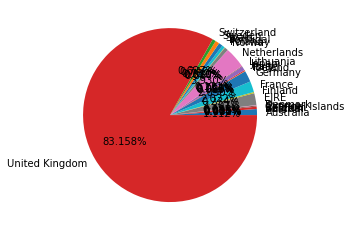

In [10]:
plt.pie(cat, labels=cat.index, autopct='%.3f%%')
plt.show()

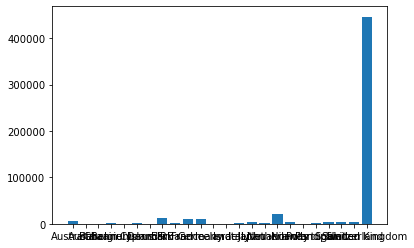

In [14]:
plt.bar(cat.index, cat)
plt.show()

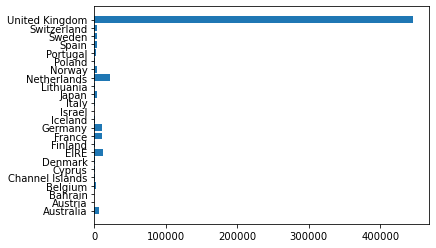

In [15]:
plt.barh(cat.index, cat)
plt.show()

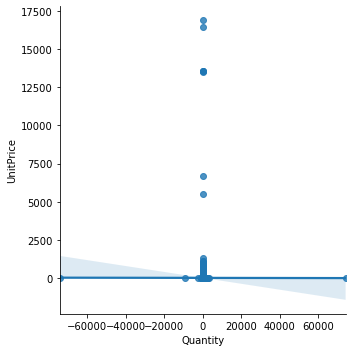

In [21]:
import seaborn as sns
sns.lmplot(y='UnitPrice', x='Quantity', data=retail)

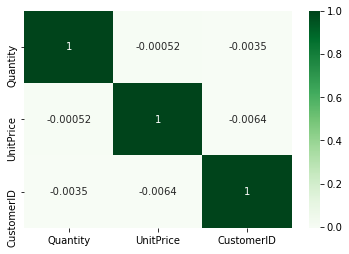

In [25]:
dog = retail.corr()
sns.heatmap(dog, cmap='Greens', annot=True)

In [26]:
import statsmodels.api as sm

In [32]:
df = pd.read_csv('c:/bd092_data/ozone.csv')
df.head(n=2)
df.tail(n=7)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [36]:
df['Ozone'] = df['Ozone'].fillna(df['Ozone'].mean())
df['Solar.R'] = df['Solar.R'].fillna(df['Solar.R'].std())
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,181.545157,9.957516,77.882353,6.993464,15.803922
std,28.693372,90.227167,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,21.000000,95.000000,7.400000,72.000000,6.000000,8.000000
50%,42.129310,194.000000,9.700000,79.000000,7.000000,16.000000
75%,46.000000,256.000000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [37]:
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67,5,1
1,36.00000,118.000000,8.0,72,5,2
2,12.00000,149.000000,12.6,74,5,3
3,18.00000,313.000000,11.5,62,5,4
4,42.12931,90.058422,14.3,56,5,5


In [39]:
x = df.drop(['Ozone', 'Month', 'Day'], axis=1)
x

,Solar.R,Wind,Temp
0,190.000000,7.4,67
1,118.000000,8.0,72
2,149.000000,12.6,74
3,313.000000,11.5,62
4,90.058422,14.3,56
...,...,...,...
148,193.000000,6.9,70
149,145.000000,13.2,77
150,191.000000,14.3,75
151,131.000000,8.0,76


In [43]:
y = df['Ozone']
x1 = sm.add_constant(x, has_constant='add')

In [44]:
x1

,const,Solar.R,Wind,Temp
0,1.0,190.000000,7.4,67
1,1.0,118.000000,8.0,72
2,1.0,149.000000,12.6,74
3,1.0,313.000000,11.5,62
4,1.0,90.058422,14.3,56
...,...,...,...,...
148,1.0,193.000000,6.9,70
149,1.0,145.000000,13.2,77
150,1.0,191.000000,14.3,75
151,1.0,131.000000,8.0,76


In [45]:
x1

,const,Solar.R,Wind,Temp
0,1.0,190.000000,7.4,67
1,1.0,118.000000,8.0,72
2,1.0,149.000000,12.6,74
3,1.0,313.000000,11.5,62
4,1.0,90.058422,14.3,56
...,...,...,...,...
148,1.0,193.000000,6.9,70
149,1.0,145.000000,13.2,77
150,1.0,191.000000,14.3,75
151,1.0,131.000000,8.0,76


In [46]:
multi_model = sm.OLS(y, x1).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     45.16
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           8.13e-21
Time:                        23:04:29   Log-Likelihood:                -680.70
No. Observations:                 153   AIC:                             1369.
Df Residuals:                     149   BIC:                             1382.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.2623     19.014     -1.907      0.058     -73.834       1.310
Solar.R        0.0529      0.020      2.677      0.008       0.014       0.092
Wind          -2.7499      0.546     -5.035      0.000      -3.829      -1.671
Temp           1.2348      0.212      5.834      0.000       0.817       1.653
==============================================================================
Omnibus:                       50.232   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.477
Skew:                           1.386   Prob(JB):                     1.14e-26
Kurtosis:                       6.326   Cond. No.                     2.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

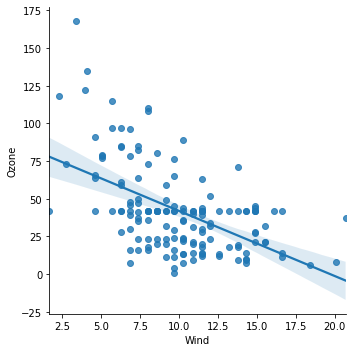

In [49]:
#회귀선 그리기 #인과관계 선으로 표현하기 
import statsmodels.api as sm
import seaborn as sns
sns.lmplot(y='Ozone', x='Wind', data=df)

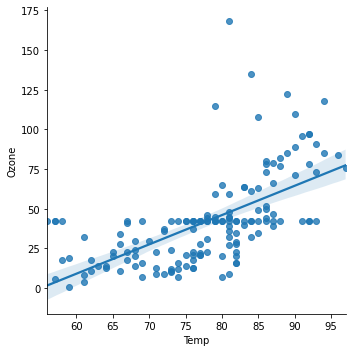

In [50]:
sns.lmplot(y='Ozone', x='Temp', data=df)

# 로지스틱 회귀분석 

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [61]:
df1 = pd.read_csv('c://bd092_data/BankPersonalLoan.csv')
df1.head()
df1.tail()
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [63]:
df1.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [64]:
df1.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [69]:
x = df1.drop('Personal Loan', axis=1)
y = df1['Personal Loan']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


In [75]:
x_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3465,65,42,1,1.9,2,0,0,0,0,0
4582,25,69,3,0.3,3,0,0,0,1,0
1922,39,25,1,1.4,3,0,0,0,0,0
1186,62,43,4,1.2,2,0,0,0,1,0
3718,45,8,2,0.1,3,0,0,0,0,1


In [98]:
stdsc = StandardScaler()
x_train.head()
x_train.iloc[:,:] = stdsc.fit_transform(x_train.iloc[:,:])
x_test.iloc[:,:] = stdsc.transform(x_test.iloc[:,:])

C:\Users\Ki beom kim\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-98-af2d017aebe2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.iloc[:,:] = stdsc.fit_transform(x_train.iloc[:,:])
C:\Users\Ki beom kim\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._se

In [102]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, x_train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.617262
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                 -0.9521
Time:                        23:37:44   Log-Likelihood:                -2160.4
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0348      0.037      0.950      0.342      -0.037       0.107
Income                 0.7018      0.053     13.353      0.000       0.599       0.805
Family                 0.1863      0.038      4.962      0.000       0.113       0.260
CCAvg                  0.0630      0.049      1.275      0.202      -0.034       0.160
Education              0.3354      0.038      8.781      0.000       0.261       0.410
Mortgage               0.0474      0.040      1.200      0.230      -0.030       0.125
Securities Account    -0.1094      0.040     -2.706      0.007      -0.189      -0.030
CD Account             0.4516      0.053      8.488      0.000       0.347       0.556
Online                -0.0535      0.037     -1.454      0.146      -0.126       0.019
CreditCard            -0.0930      0.038     -2.431      0.015      -0.168      -0.018
======================================================================================
"""

In [106]:
# 로짓값들을 오즈비로 변환하기 
cat = logit_model.params
np.exp(cat).sort_values(ascending=False)

Income                2.017448
CD Account            1.570839
Education             1.398521
Family                1.204842
CCAvg                 1.065048
Mortgage              1.048584
Age                   1.035461
Online                0.947919
CreditCard            0.911203
Securities Account    0.896381
dtype: float64